# Test learning rate finder and one cycle learning rate

From fast.ai

Test this implementation:

https://github.com/titu1994/keras-one-cycle

## Set up model and data

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.models import *
from cbrain.utils import limit_mem

Using TensorFlow backend.
/home/s/S.Rasp/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
limit_mem()

In [4]:
DATADIR = '/local/S.Rasp/preprocessed_data/'

In [5]:
train_gen = DataGenerator(
    data_dir=DATADIR, 
    feature_fn='32_col_engy_ess_3d_train_shuffle_features.nc',
    target_fn='32_col_engy_ess_3d_train_shuffle_targets.nc',
    batch_size=512,
    norm_fn='32_col_engy_ess_3d_train_norm.nc',
    fsub='feature_means', 
    fdiv='feature_stds', 
    tmult='target_conv',
    shuffle=True,
)

Generator will have 14057472 samples in 27456 batches
Features have shape 94; targets have shape 65


In [20]:
model = fc_model(94, 65, [256]*9, 1e-3, 'mse', activation='LeakyReLU')

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 94)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               24320     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 256)               0         
__________

In [12]:
model.fit_generator(
    train_gen.return_generator(),   # This actually returns the generator
    train_gen.n_batches,
    epochs=1
)

Epoch 1/1
 5378/27456 [====>.........................] - ETA: 4:07 - loss: 0.0025 - rmse: 0.0376 - log_loss: -1.5400 - var_ratio: 0.6953 - mean_squared_error: 0.0025 - var_loss: 6.3088e-06

KeyboardInterrupt: 

## Now use Learning rate finder

In [13]:
from clr import LRFinder

In [71]:
model = fc_model(94, 65, [256]*9, 1e-3, 'mse', activation='LeakyReLU')

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [72]:
train_gen.n_batches

27456

In [73]:
lr_callback = LRFinder(train_gen.n_batches * 10, train_gen.batch_size,
                       1e-5, 1e-3, stopping_criterion_factor=50,
                       # validation_data=(X_val, Y_val),
                       lr_scale='exp')

In [74]:
model.fit_generator(
    train_gen.return_generator(),   # This actually returns the generator
    1000,
    epochs=1,
    callbacks=[lr_callback]
)

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Epoch 1/1
   2/1000 [..............................] - ETA: 3:45 - loss: 0.0109 - rmse: 0.0949 - log_loss: -1.0608 - var_ratio: 0.3792 - mean_squared_error: 0.0109 - var_loss: 2.3856e-05 - LRFinder: lr = 0.00001017 
 - LRFinder: lr = 0.00001026 
 - LRFinder: lr = 0.00001035 
 - LRFinder: lr = 0.00001044 
 - LRFinder: lr = 0.00001053 
 - LRFinder: lr = 0.00001062 
   8/1000 [..............................] - ETA: 1:02 - loss: 0.0106 - rmse: 0.0926 - log_loss: -1.0736 - var_ratio: 0.3314 - mean_squared_error: 0.0106 - var_loss: 2.8646e-05 - LRFinder: lr = 0.00001071 
 - LRFinder: lr = 0.00001081 
 - LRFinder: lr = 0.00001090 
 - LRFinder: lr = 0.00001099 
 - LRFinder: lr = 0.00001109 
 - LRFinder: lr = 0.00001118 
  14/1000 [..............................] - ETA: 39s - loss: 0.0103 - rmse: 0.0906 - log_loss: -1.0858 - var_ratio: 0.2934 - mean_squared_error: 0.0103 - var_loss: 3.2819e-05  - LRFinder: lr = 0.00001128 
 - LRFinder: lr = 0.00001138 
 - LRFinder: lr = 0.00001148 
 - LRFinder:

 - LRFinder: lr = 0.00002883 
 - LRFinder: lr = 0.00002908 
 125/1000 [==>...........................] - ETA: 13s - loss: 0.0071 - rmse: 0.0715 - log_loss: -1.2119 - var_ratio: 0.2286 - mean_squared_error: 0.0071 - var_loss: 3.8495e-05 - LRFinder: lr = 0.00002933 
 - LRFinder: lr = 0.00002958 
 - LRFinder: lr = 0.00002984 
 - LRFinder: lr = 0.00003010 
 - LRFinder: lr = 0.00003036 
 130/1000 [==>...........................] - ETA: 12s - loss: 0.0070 - rmse: 0.0710 - log_loss: -1.2157 - var_ratio: 0.2337 - mean_squared_error: 0.0070 - var_loss: 3.8160e-05 - LRFinder: lr = 0.00003062 
 - LRFinder: lr = 0.00003088 
 - LRFinder: lr = 0.00003115 
 - LRFinder: lr = 0.00003142 
 - LRFinder: lr = 0.00003169 
 135/1000 [===>..........................] - ETA: 12s - loss: 0.0069 - rmse: 0.0705 - log_loss: -1.2195 - var_ratio: 0.2399 - mean_squared_error: 0.0069 - var_loss: 3.7619e-05 - LRFinder: lr = 0.00003196 
 - LRFinder: lr = 0.00003224 
 - LRFinder: lr = 0.00003252 
 - LRFinder: lr = 0.00003

 - LRFinder: lr = 0.00008676 
 - LRFinder: lr = 0.00008751 
 - LRFinder: lr = 0.00008827 
 - LRFinder: lr = 0.00008903 
 255/1000 [======>.......................] - ETA: 9s - loss: 0.0053 - rmse: 0.0598 - log_loss: -1.3082 - var_ratio: 0.3926 - mean_squared_error: 0.0053 - var_loss: 2.5851e-05 - LRFinder: lr = 0.00008980 
 - LRFinder: lr = 0.00009058 
 - LRFinder: lr = 0.00009136 
 - LRFinder: lr = 0.00009215 
 - LRFinder: lr = 0.00009294 
 - LRFinder: lr = 0.00009375 
 261/1000 [======>.......................] - ETA: 9s - loss: 0.0053 - rmse: 0.0594 - log_loss: -1.3117 - var_ratio: 0.3980 - mean_squared_error: 0.0053 - var_loss: 2.5476e-05 - LRFinder: lr = 0.00009456 
 - LRFinder: lr = 0.00009538 
 - LRFinder: lr = 0.00009620 
 - LRFinder: lr = 0.00009703 
 - LRFinder: lr = 0.00009787 
 - LRFinder: lr = 0.00009872 
 267/1000 [=======>......................] - ETA: 9s - loss: 0.0052 - rmse: 0.0591 - log_loss: -1.3150 - var_ratio: 0.4027 - mean_squared_error: 0.0052 - var_loss: 2.5145e-

 - LRFinder: lr = 0.00026564 
 - LRFinder: lr = 0.00026794 
 - LRFinder: lr = 0.00027026 
 384/1000 [==========>...................] - ETA: 7s - loss: 0.0045 - rmse: 0.0540 - log_loss: -1.3633 - var_ratio: 0.4745 - mean_squared_error: 0.0045 - var_loss: 2.0193e-05 - LRFinder: lr = 0.00027259 
 - LRFinder: lr = 0.00027495 
 - LRFinder: lr = 0.00027733 
 - LRFinder: lr = 0.00027972 
 - LRFinder: lr = 0.00028214 
 389/1000 [==========>...................] - ETA: 7s - loss: 0.0045 - rmse: 0.0538 - log_loss: -1.3649 - var_ratio: 0.4769 - mean_squared_error: 0.0045 - var_loss: 2.0021e-05 - LRFinder: lr = 0.00028458 
 - LRFinder: lr = 0.00028704 
 - LRFinder: lr = 0.00028952 
 - LRFinder: lr = 0.00029203 
 - LRFinder: lr = 0.00029455 
 394/1000 [==========>...................] - ETA: 7s - loss: 0.0045 - rmse: 0.0537 - log_loss: -1.3665 - var_ratio: 0.4792 - mean_squared_error: 0.0045 - var_loss: 1.9873e-05 - LRFinder: lr = 0.00029710 
 - LRFinder: lr = 0.00029966 
 - LRFinder: lr = 0.00030225

 - LRFinder: lr = 0.00081335 
 - LRFinder: lr = 0.00082039 
 - LRFinder: lr = 0.00082748 
 514/1000 [==============>...............] - ETA: 5s - loss: 0.0041 - rmse: 0.0507 - log_loss: -1.3956 - var_ratio: 0.5203 - mean_squared_error: 0.0041 - var_loss: 1.7173e-05 - LRFinder: lr = 0.00083463 
 - LRFinder: lr = 0.00084185 
 - LRFinder: lr = 0.00084912 
 - LRFinder: lr = 0.00085647 
 518/1000 [==============>...............] - ETA: 5s - loss: 0.0041 - rmse: 0.0506 - log_loss: -1.3964 - var_ratio: 0.5211 - mean_squared_error: 0.0041 - var_loss: 1.7109e-05 - LRFinder: lr = 0.00086387 
 - LRFinder: lr = 0.00087134 
 - LRFinder: lr = 0.00087887 
 - LRFinder: lr = 0.00088647 
 - LRFinder: lr = 0.00089413 
 523/1000 [==============>...............] - ETA: 5s - loss: 0.0041 - rmse: 0.0506 - log_loss: -1.3973 - var_ratio: 0.5225 - mean_squared_error: 0.0041 - var_loss: 1.7027e-05 - LRFinder: lr = 0.00090186 
 - LRFinder: lr = 0.00090966 
 - LRFinder: lr = 0.00091752 
 - LRFinder: lr = 0.00092545

 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 775/1000 [======================>.......] - ETA: 2s - loss: 1.3732 - rmse: 0.0920 - log_loss: -1.4119 - var_ratio: 178.5943 - mean_squared_error: 1.3732 - var_loss: 1358.2080 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 780/1000 [======================>.......] - ETA: 2s - loss: 1103527.2103 - rmse: 33.0798 - log_loss: -1.3841 - var_ratio: 151443152.9508 - mean_squared_error: 1103527.2103 - var_loss: 938481877500781.0000 - LRFinder: Skipp

 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 906/1000 [==========================>...] - ETA: 1s - loss: 2323240285886.0132 - rmse: 237269.1017 - log_loss: -0.4047 - var_ratio: 282737094213453.6250 - mean_squared_error: 2323240285886.0132 - var_loss: 431125151227825511586594816.0000 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 912/1000 [==========================>...] - ETA: 0s - loss: 230804161602

 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 974/1000 [============================>.] - ETA: 0s - loss: 2161567541177.6838 - rmse: 226025.4355 - log_loss: -0.0390 - var_ratio: 263063880084084.8750 - mean_squared_error: 2161567541177.6838 - var_loss: 401026069048237989231067136.0000 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best loss (0.0021)
 - LRFinder: Skipping iteration since loss is 50 times as large as best l

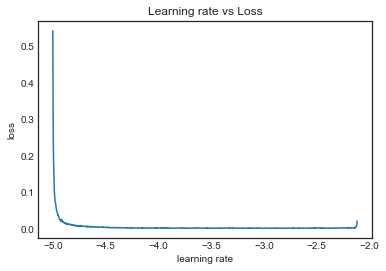

In [75]:
lr_callback.plot_schedule()

In [81]:
10**-4.5, 10**-2.5

(3.1622776601683795e-05, 0.0031622776601683794)

In [82]:
lr = 1e-4

np.log10(lr)

## One Cycle

In [87]:
from clr import OneCycleLR

In [90]:
lr_manager = OneCycleLR(train_gen.n_batches * train_gen.batch_size, train_gen.n_batches, train_gen.batch_size, 
                        max_lr=lr,
                        end_percentage=0.1, scale_percentage=None,
                        maximum_momentum=0.95, minimum_momentum=0.85)

In [91]:
model = fc_model(94, 65, [256]*9, 1e-3, 'mse', activation='LeakyReLU')

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [94]:
optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.95, nesterov=True)

In [95]:
model.optimizer = optimizer

In [96]:
model.fit_generator(
    train_gen.return_generator(),   # This actually returns the generator
    train_gen.n_batches,
    epochs=1,
    callbacks=[lr_manager]
)

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Epoch 1/1
27456/27456 [==============================] - 228s 8ms/step - loss: 0.0084 - rmse: 0.0805 - log_loss: -1.1461 - var_ratio: 0.2271 - mean_squared_error: 0.0084 - var_loss: 3.9136e-05
 - lr: 0.00001 - momentum: 0.95 


In [97]:
model.fit_generator(
    train_gen.return_generator(),   # This actually returns the generator
    train_gen.n_batches,
    epochs=1,
    callbacks=[lr_manager]
)

Epoch 1/1
27456/27456 [==============================] - 229s 8ms/step - loss: 0.0071 - rmse: 0.0714 - log_loss: -1.2094 - var_ratio: 0.1970 - mean_squared_error: 0.0071 - var_loss: 4.2018e-05
 - lr: 0.00001 - momentum: 0.95 


## Find momentum

In [86]:
!ls -lh $DATADIR

total 330G
-rw-r--r-- 1 S.Rasp ls-craig  54G Jan 10 16:22 32_col_engy_ess_1y_train_features.nc
-rw-r--r-- 1 S.Rasp ls-craig  54G Jan 10 17:08 32_col_engy_ess_1y_train_shuffle_features.nc
-rw-r--r-- 1 S.Rasp ls-craig  38G Jan 10 17:08 32_col_engy_ess_1y_train_shuffle_targets.nc
-rw-r--r-- 1 S.Rasp ls-craig  38G Jan 10 16:32 32_col_engy_ess_1y_train_targets.nc
-rw-r--r-- 1 S.Rasp ls-craig 5.3G Jan  8 12:49 32_col_engy_ess_3d_train_features.nc
-rw-r--r-- 1 S.Rasp ls-craig  24K Jan  8 12:48 32_col_engy_ess_3d_train_norm.nc
-rw-r--r-- 1 S.Rasp ls-craig 5.3G Jan  8 13:03 32_col_engy_ess_3d_train_shuffle_features.nc
-rw-r--r-- 1 S.Rasp ls-craig 3.8G Jan  8 13:03 32_col_engy_ess_3d_train_shuffle_targets.nc
-rw-r--r-- 1 S.Rasp ls-craig 3.8G Jan  8 12:50 32_col_engy_ess_3d_train_targets.nc
-rw-r--r-- 1 S.Rasp ls-craig 1.4G Jan  9 11:17 32_col_engy_ess_3d_valid_features.nc
-rw-r--r-- 1 S.Rasp ls-craig 952M Jan  9 11:17 32_col_engy_ess_3d_valid_targets.nc
-rw-r--r-- 1 S.Rasp ls-craig 2.8G Jan 15 1

In [84]:
for m in [0.9, 0.95, 0.99]:
    model = fc_model(94, 65, [256]*9, 1e-3, 'mse', activation='LeakyReLU')
    lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.002, maximum_lr=0.02,
                          validation_data=(X_test, Y_test),
                          validation_sample_rate=5,
                          lr_scale='linear', save_dir='weights/momentum/momentum-%s/' % str(momentum),
                          verbose=True)
    optimizer = SGD(lr=0.002, momentum=momentum, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


NameError: name 'num_samples' is not defined